<a href="https://colab.research.google.com/github/nguyenducminh2206/ComputerVision-Projects/blob/main/Helmet_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/THU-MIG/yolov10.git

In [ ]:
%cd yolov10
!pip install -r requirements.txt

In [ ]:
!pip install -e .

In [ ]:
!wget https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10n.pt

In [7]:
from ultralytics import YOLOv10

In [8]:
model_path = 'yolov10n.pt'
model = YOLOv10(model_path)

In [ ]:
! gdown '1tr9PSRRdlC2pNir7jsYugpSMG-7v32VJ' -O './images/'

In [11]:
img_path = '/content/yolov10/images/HCMC_Street.jpg'
result = model(source=img_path)[0]


image 1/1 /content/yolov10/images/HCMC_Street.jpg: 448x640 11 persons, 2 bicycles, 1 car, 2 motorcycles, 70.7ms
Speed: 14.6ms preprocess, 70.7ms inference, 3.7ms postprocess per image at shape (1, 3, 448, 640)


In [13]:
result.save('./images/HCMC_Street_predict.png')

'./images/HCMC_Street_predict.png'

In [ ]:
!gdown '1twdtZEfcw4ghSZIiPDypJurZnNXzMO7R'

In [15]:
!mkdir safety_helmet_dataset

In [17]:
!unzip -q '/content/yolov10/Safety_Helmet_Dataset.zip' -d '/content/yolov10/safety_helmet_dataset'

In [ ]:
yaml_path = '/content/yolov10/safety_helmet_dataset/data.yaml'
epochs = 30
img_size = 640
batch_size = 16

model.train(data=yaml_path,
            epochs=epochs,
            imgsz=img_size)

In [ ]:
trained_model_path = '/content/yolov10/runs/detect/train/weights/best.pt'
model = YOLOv10(trained_model_path)

model.val(data=yaml_path,
          imgsz=img_size,
          split='test')

## Test trained YOLOv10 model

In [20]:
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [21]:
model_path = 'yolov10n.pt'
model = YOLOv10(model_path)

In [23]:
test_img_dir = '/content/yolov10/safety_helmet_dataset/test/images'

In [25]:
test_images = [os.path.join(test_img_dir, img) for img in os.listdir(test_img_dir) if img.endswith('.jpg') or img.endswith('.png')]

In [31]:
# Select 1 or 2 images to test
selected_test_images = test_images[:2]  # Adjust the number of images as needed

# Run inference on selected test images
for img_path in selected_test_images:
    # Perform inference
    results = model.predict(img_path)

    # Print results
    print(f"Results for {img_path}:")
    for result in results:
        for box in result.boxes:
            # Extract bounding box coordinates, confidence, and class_id
            coords = box.xyxy[0]  # Extract the coordinates from the tensor
            x1, y1, x2, y2 = coords[0], coords[1], coords[2], coords[3]
            confidence = box.conf[0].item()  # Extract confidence as a Python float
            class_id = box.cls.item()  # Extract class_id as a Python int

            # Print the results
            print(f"Class ID: {class_id}, Confidence: {confidence:.2f}, Bounding Box: ({x1:.2f}, {y1:.2f}, {x2:.2f}, {y2:.2f})")
    print("\n")


image 1/1 /content/yolov10/safety_helmet_dataset/test/images/person-509-_jpg.rf.8f332fcdb0e9cb2ecc334fe017939499.jpg: 640x640 1 person, 16.4ms
Speed: 7.3ms preprocess, 16.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Results for /content/yolov10/safety_helmet_dataset/test/images/person-509-_jpg.rf.8f332fcdb0e9cb2ecc334fe017939499.jpg:
Class ID: 0.0, Confidence: 0.80, Bounding Box: (0.41, 79.69, 238.11, 415.59)



image 1/1 /content/yolov10/safety_helmet_dataset/test/images/person-497-_jpg.rf.829207af90f0a48dd92accaf81cd84aa.jpg: 640x640 2 persons, 15.0ms
Speed: 3.0ms preprocess, 15.0ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)
Results for /content/yolov10/safety_helmet_dataset/test/images/person-497-_jpg.rf.829207af90f0a48dd92accaf81cd84aa.jpg:
Class ID: 0.0, Confidence: 0.92, Bounding Box: (0.18, 31.10, 224.70, 415.37)
Class ID: 0.0, Confidence: 0.33, Bounding Box: (0.09, 25.00, 39.67, 159.11)





image 1/1 /content/yolov10/safety_helmet_dataset/test/images/helmet-182-_jpg.rf.d48ae0584d9795f52996657c5afee0f6.jpg: 640x640 3 persons, 5 chairs, 1 dining table, 12.6ms
Speed: 2.6ms preprocess, 12.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


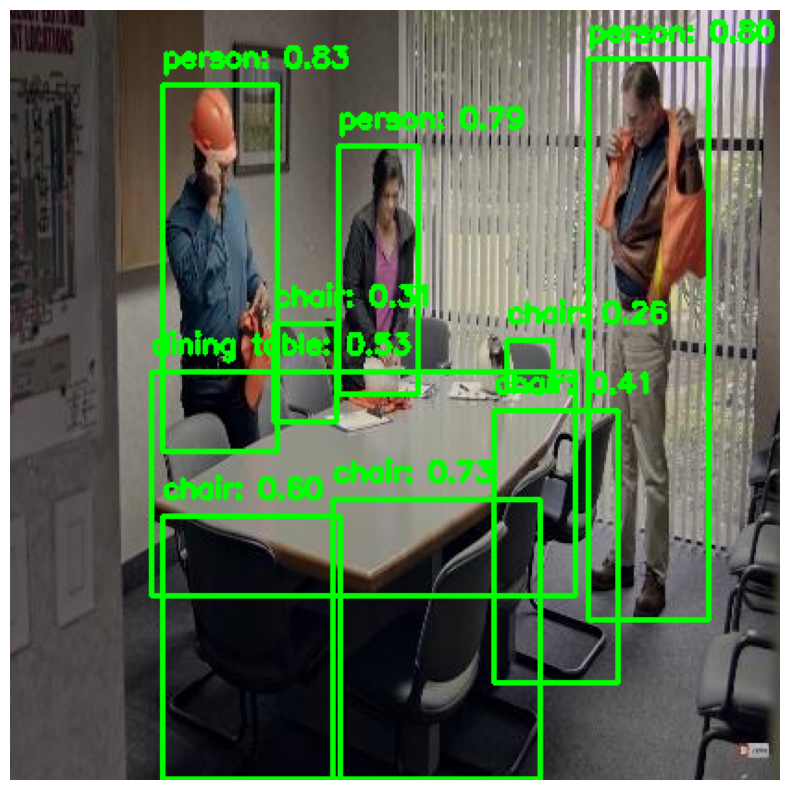


image 1/1 /content/yolov10/safety_helmet_dataset/test/images/helmet-390-_jpg.rf.a0239dd115d10d504255351af2fed164.jpg: 640x640 2 persons, 1 bird, 16.2ms
Speed: 3.0ms preprocess, 16.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


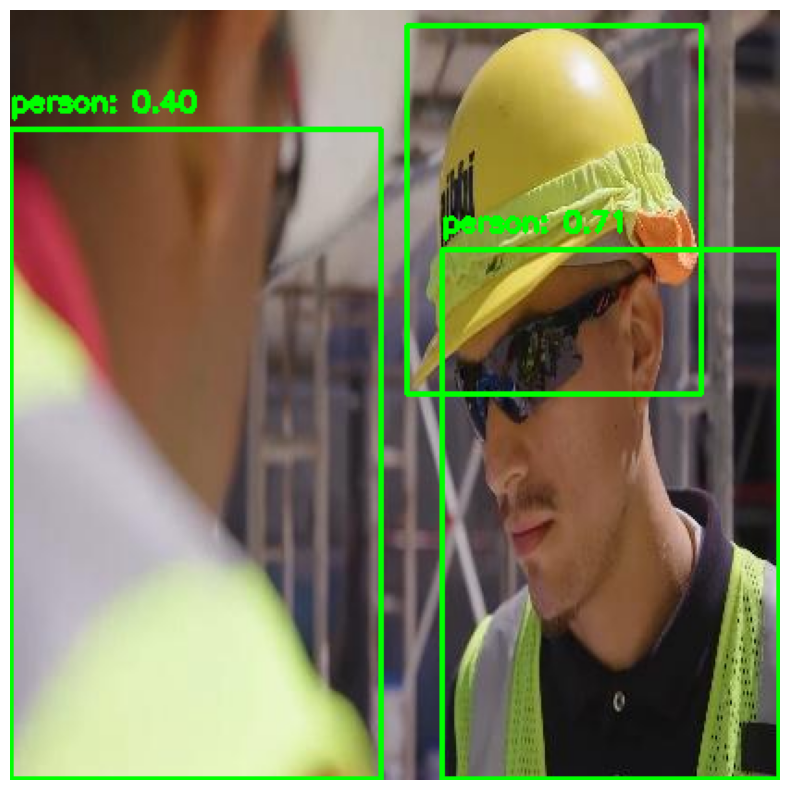

In [38]:
# Set a lower confidence threshold if needed
confidence_threshold = 0.25

# Select 1 or 2 images to test
selected_test_images = test_images[8:10]  # Adjust the number of images as needed

# Run inference on selected test images
for img_path in selected_test_images:
    # Perform inference
    results = model.predict(img_path, conf=confidence_threshold)

    # Load the image
    img = cv2.imread(img_path)

    # Draw bounding boxes and labels on the image
    for result in results:
        for box in result.boxes:
            # Extract bounding box coordinates, confidence, and class_id
            coords = box.xyxy[0]  # Extract the coordinates from the tensor
            x1, y1, x2, y2 = int(coords[0]), int(coords[1]), int(coords[2]), int(coords[3])
            confidence = box.conf[0].item()  # Extract confidence as a Python float
            class_id = int(box.cls[0].item())  # Extract class_id as a Python int

            # Draw bounding box
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            # Draw label
            label = f"{model.names[class_id]}: {confidence:.2f}"
            cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Display the image
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()